<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoostRegressor</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

**Библиотеки**

In [1]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/6f/36/2f5105c5accba2a58a8c6fda8d890fe8de329545f673a4f62235a67d723d/shap-0.44.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.2/448.2 kB 1.2 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import shap

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor

## Подготовка

In [3]:
df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


### Вывод 
Нам предоставлены данные за период 1 марта 2018 по 31 августа 2018

Данные ресемплирование по одному часу

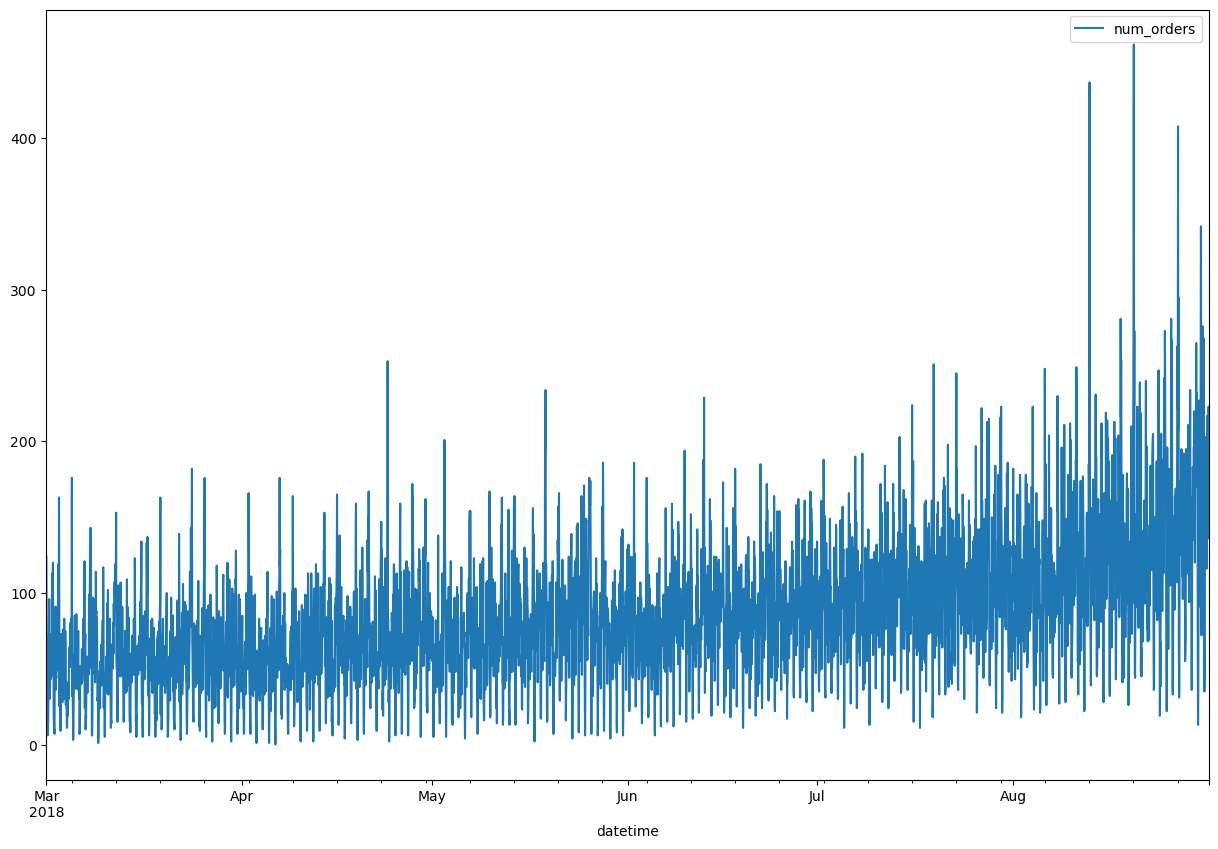

In [4]:
df = df.resample('1H').sum()
df.plot(figsize=(15,10))
None

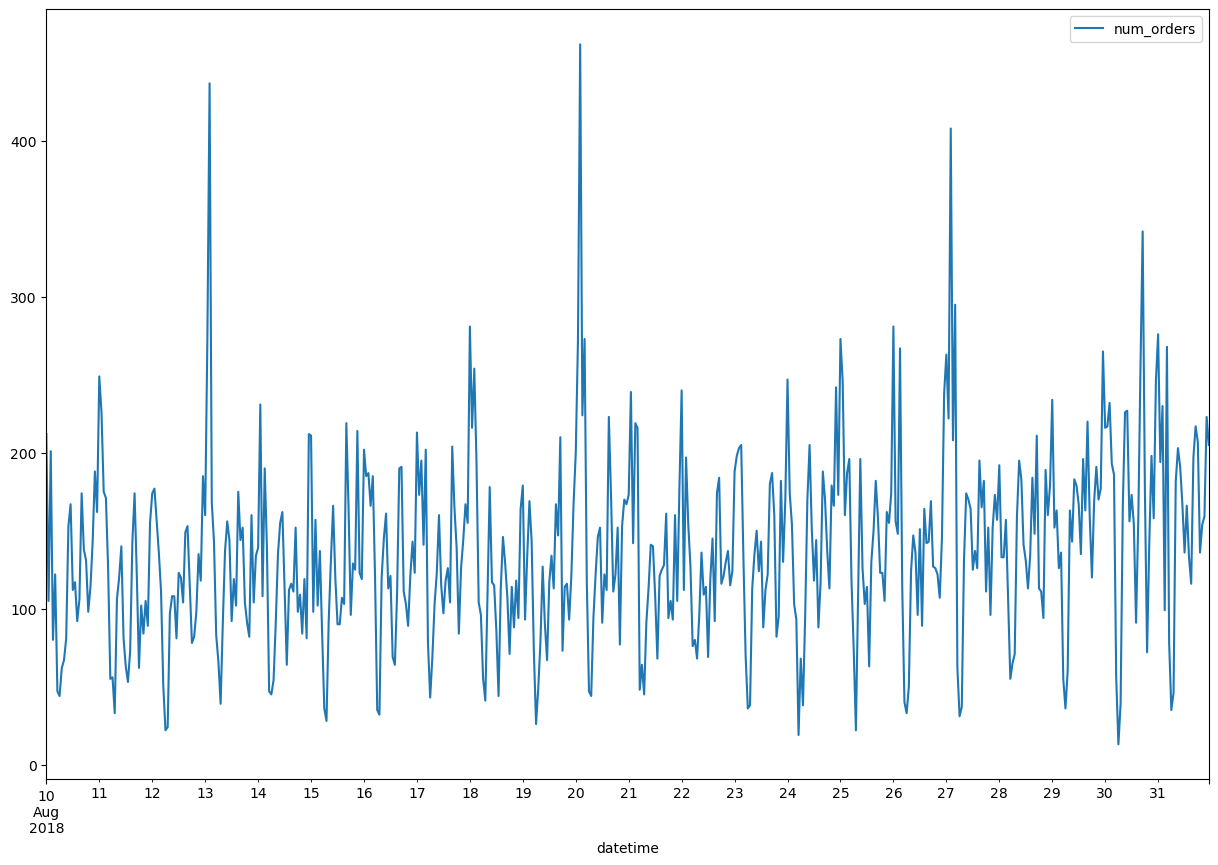

In [5]:
df['2018-08-10':'2018-08-31'].plot(figsize=(15,10))
None

## Анализ

Рассмотрим тренд, сезонность и остаток

In [6]:
decomposed = seasonal_decompose(df) 

**Тренд**

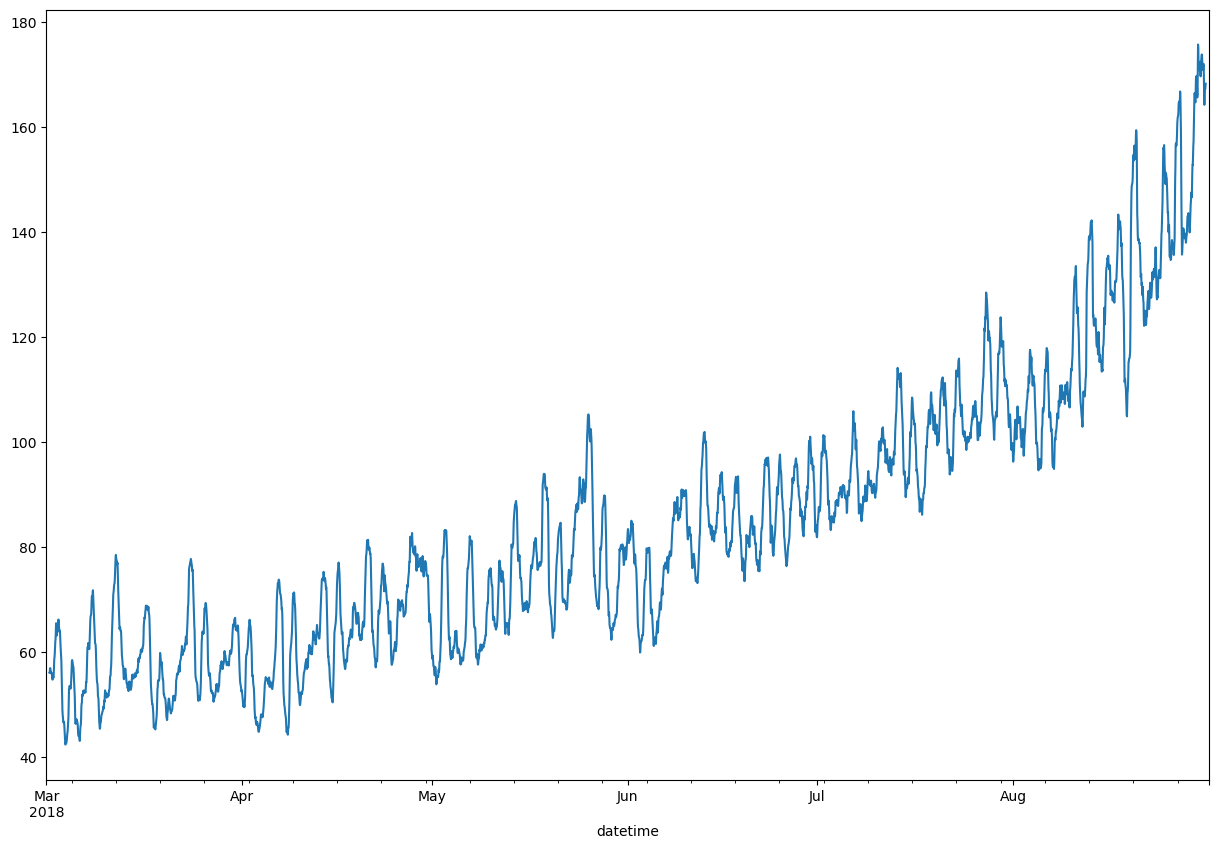

In [7]:
decomposed.trend.plot(figsize=(15,10))
None

Рассмотрим на меньшем промежутке

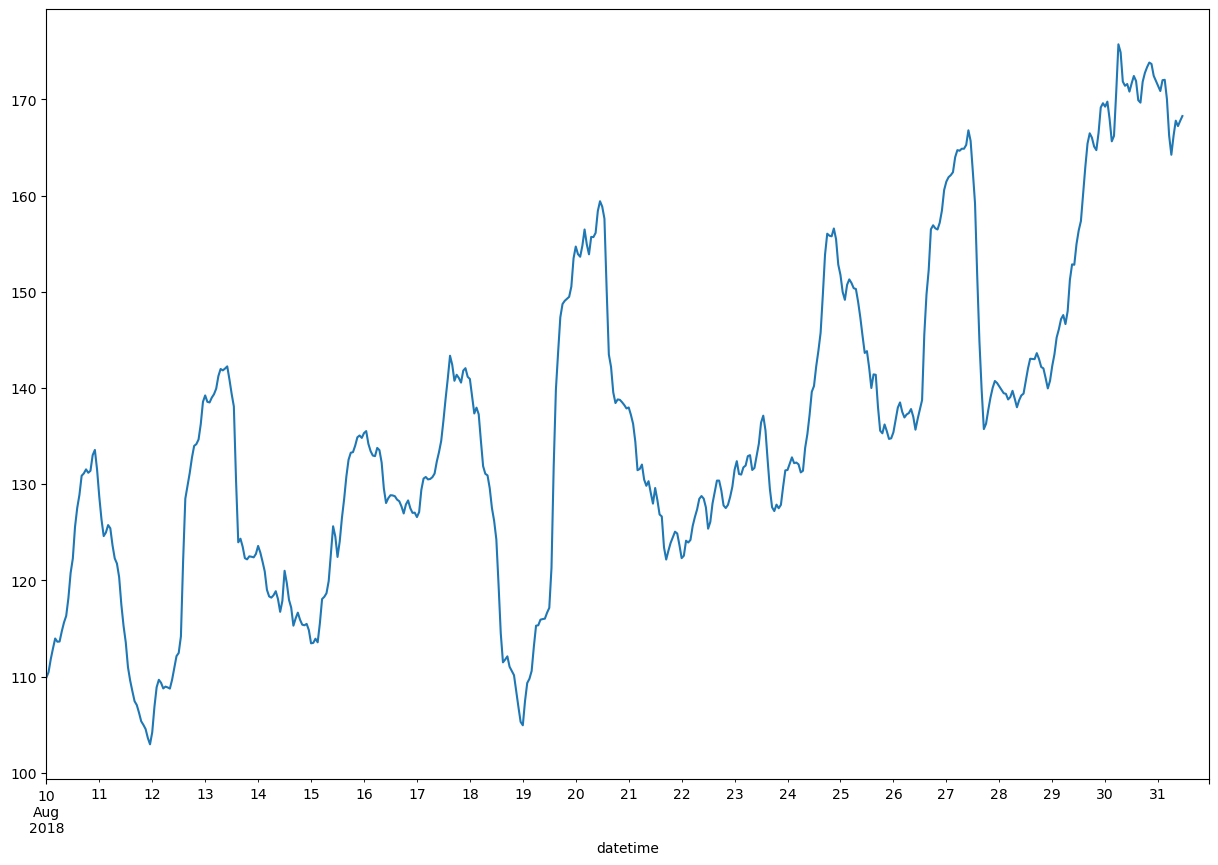

In [8]:
decomposed.trend['2018-08-10':'2018-08-31'].plot(figsize=(15,10))
None

**Сезонность**

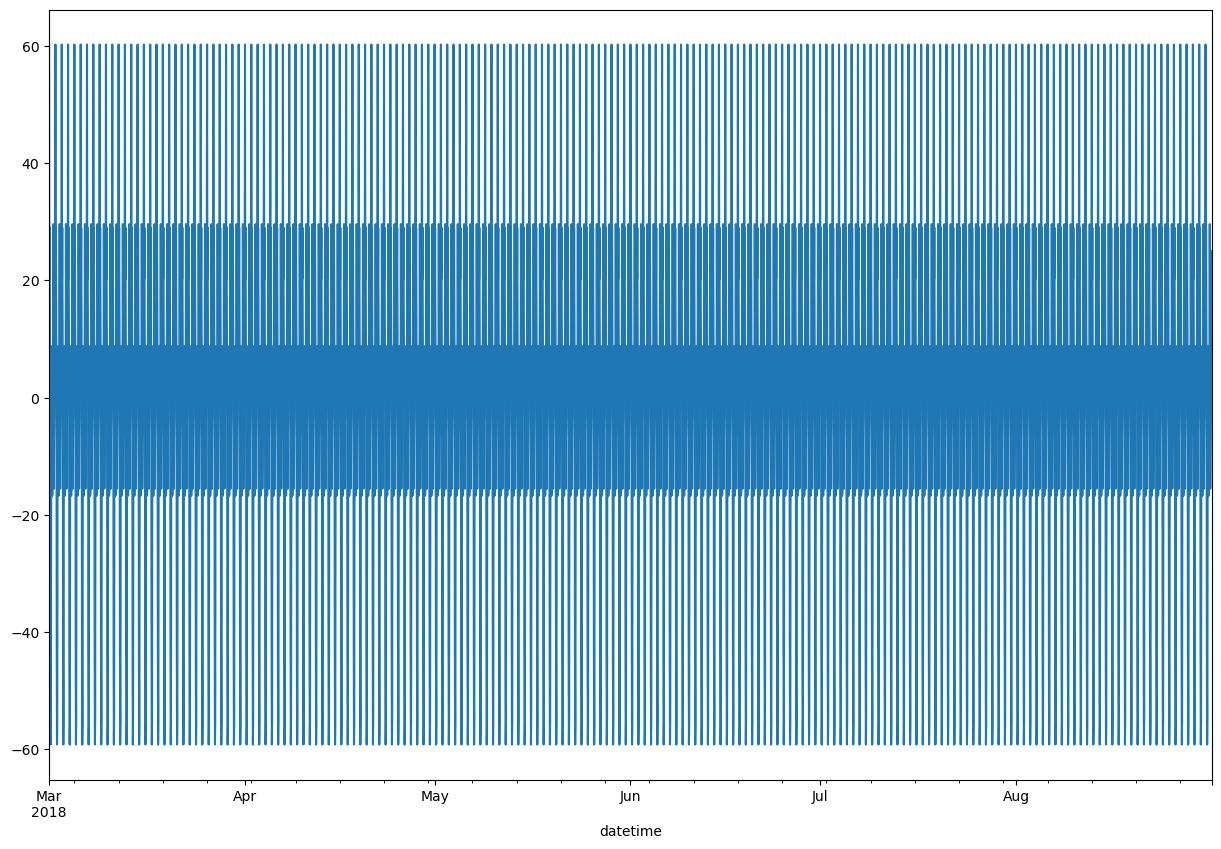

In [9]:
decomposed.seasonal.plot(figsize=(15,10))
None

Рассмотрим на меньшем промежутке

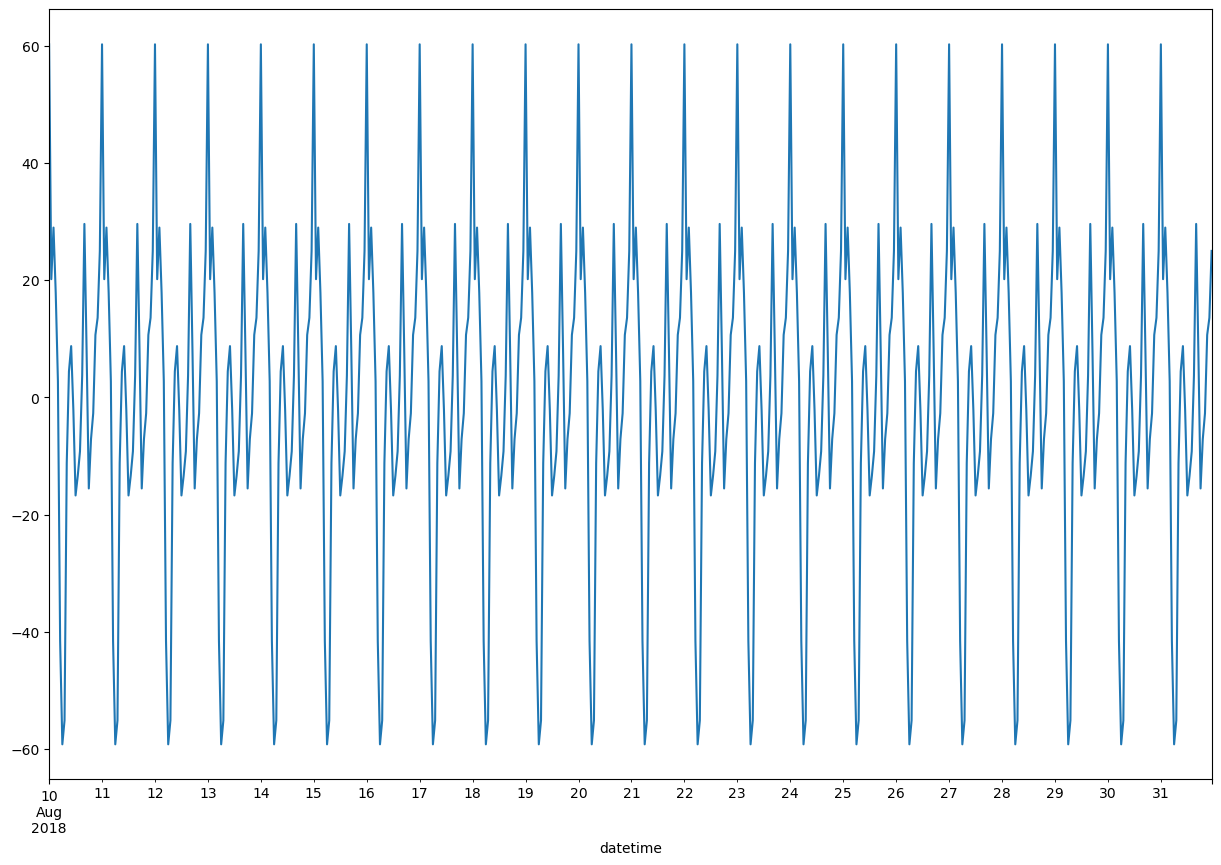

In [10]:
decomposed.seasonal['2018-08-10':'2018-08-31'].plot(figsize=(15,10))
None

**Остаток**

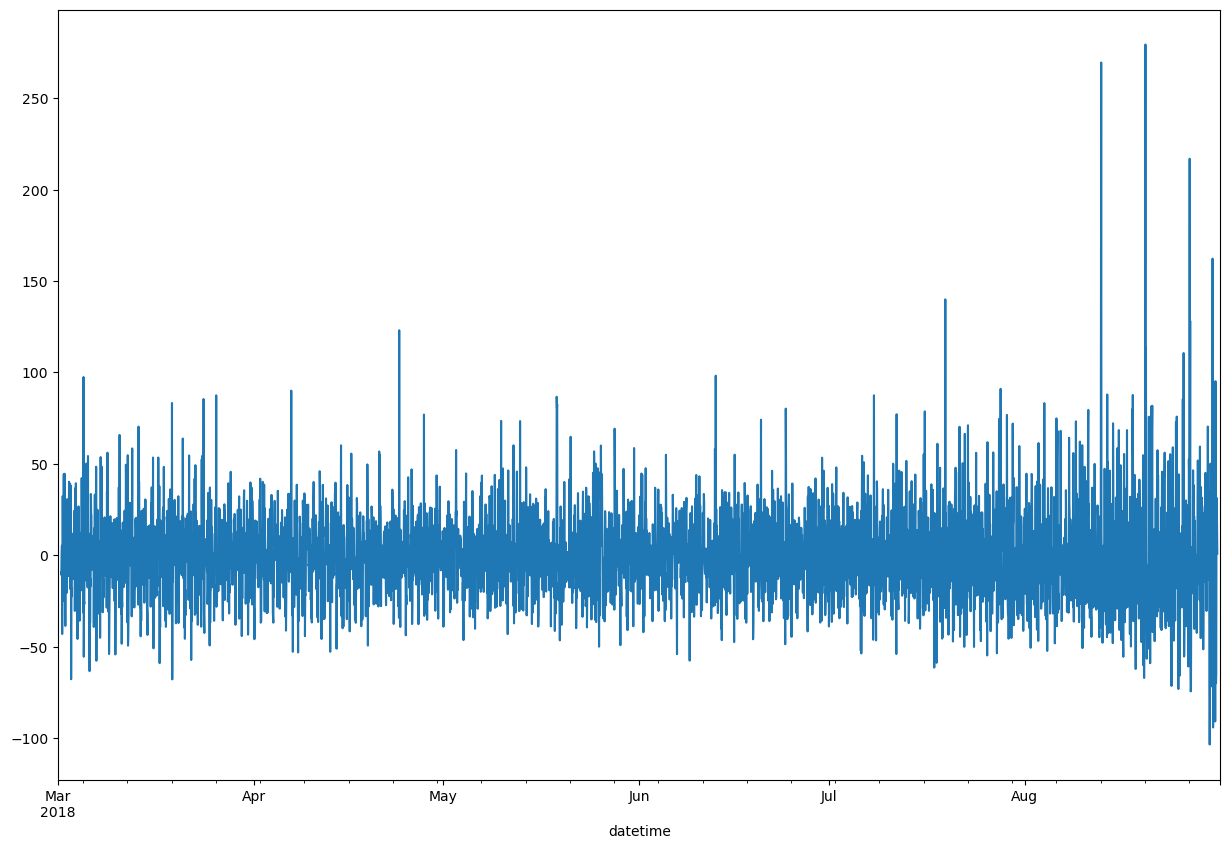

In [11]:
decomposed.resid.plot(figsize=(15,10))
None

Рассмотрим на меньшем промежутке

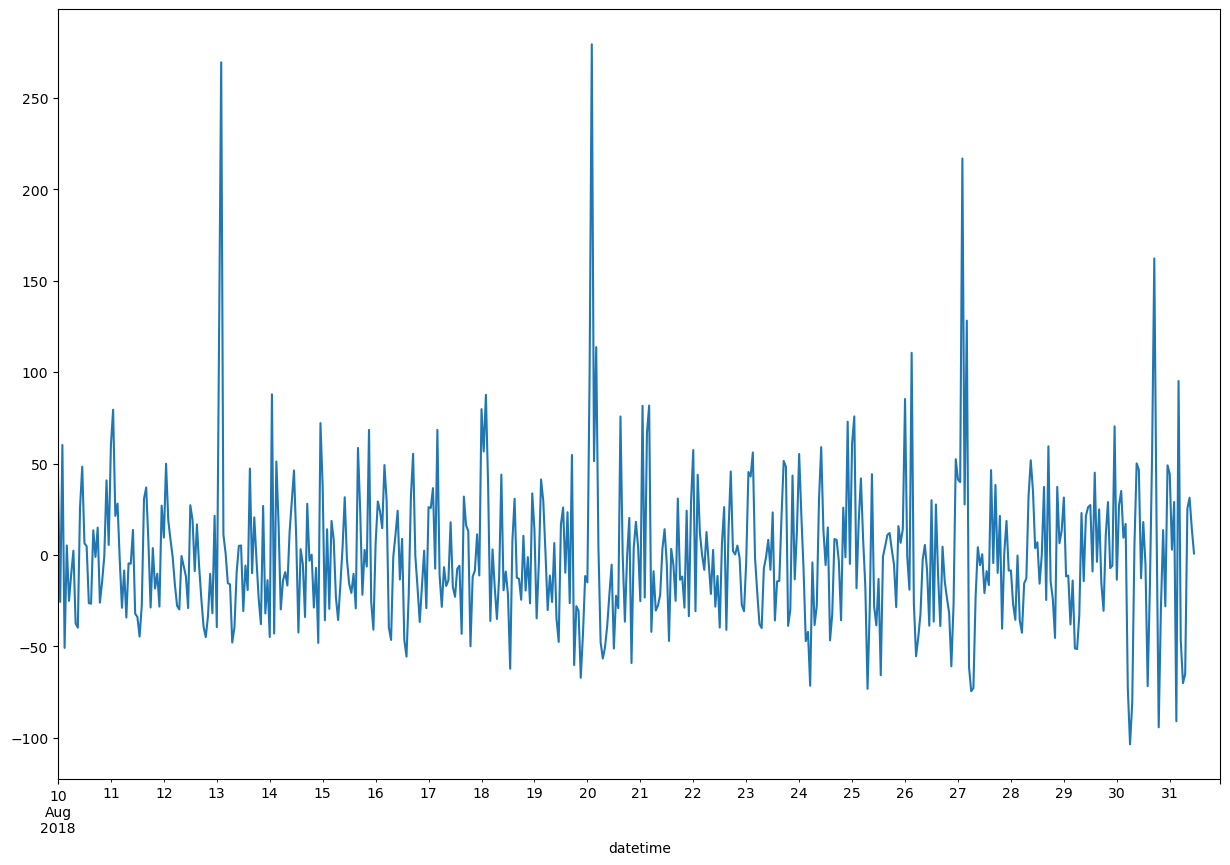

In [12]:
decomposed.resid['2018-08-10':'2018-08-31'].plot(figsize=(15,10))
None

### Вывод:

1) Меняется среднее значение

2) Меняется стандатрное отклонение

3) Данный ряд не является стационарным, так как он меняется со временем

**Создадим новые признаки**

In [13]:
def make_features(max_lag, rolling_mean_size):
    data = df.copy()
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

In [14]:
data = make_features(max_lag=24, rolling_mean_size=48)

In [15]:
data.head()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Разобьем данные на обучающуюся и на тестовую выборку** 

In [16]:
RANDOM_STATE = 42
TEST_SIZE = 0.1
train, test = train_test_split(data, shuffle=False, random_state=RANDOM_STATE, test_size=TEST_SIZE)
train = train.dropna()

**Разметим выборки**

In [17]:
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']

X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

In [18]:
# масштабирование количественных переменных с помощью стандартизации
def standard_quantitative_attribute(X_train, X_test, scaler):
    num_col_names = X_train.select_dtypes(exclude='object').columns.to_list()
    
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    return X_train_scaled, X_test_scaled

In [19]:
scaler = StandardScaler()
X_train, X_test = standard_quantitative_attribute(X_train, X_test, scaler)

## Обучение

### Linear Regression

In [20]:
def grid_search_cv(model, param_grid, X_train, y_train):
    tscv = TimeSeriesSplit(n_splits=5)
    grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print("Лучший результат кросс-валидации (RMSE):", np.sqrt(-grid_search.best_score_))
    return round(np.sqrt(-grid_search.best_score_)), grid_search.best_estimator_

In [21]:
param_grid = {}
model_lr = LinearRegression()
rmse_lr, model_lr = grid_search_cv(model_lr, param_grid, X_train, y_train)

Лучший результат кросс-валидации (RMSE): 28580144150997.297


### RandomForestRegressor

In [22]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [10,50,100,30]
}
model_forest = RandomForestRegressor(random_state=RANDOM_STATE)
rmse_forest, model_forest = grid_search_cv(model_forest, param_grid, X_train, y_train)

Лучший результат кросс-валидации (RMSE): 26.14977923475613


###  LGBMRegressor

In [23]:
model_lgb = lgb.LGBMRegressor(random_state=RANDOM_STATE)
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}
rmse_lgb, model_lgb = grid_search_cv(model_lgb, param_grid, X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3346
[LightGBM] [Info] Number of data points in the train set: 1310, number of used features: 28
[LightGBM] [Info] Start training from score 59.392366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4453
[LightGBM] [Info] Number of data points in the train set: 3272, number of used features: 28
[LightGBM] [Info] Start training from score 72.634474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 656, number of used features: 27
[LightGBM] [Info] Start train

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4852
[LightGBM] [Info] Number of data points in the train set: 3926, number of used features: 28
[LightGBM] [Info] Start training from score 78.516811
Лучший результат кросс-валидации (RMSE): 26.110845071888157


### CatBoostRegressor

In [24]:
model_cat_boost = CatBoostRegressor(random_state=RANDOM_STATE, verbose=False)
categorical_columns = X_train.select_dtypes(include='object').columns.to_list()
param_grid = {
    'learning_rate': [0.01, 0.1],
    'iterations': [50, 100]
}
rmse_cat_boost, model_cat_boost = grid_search_cv(model_cat_boost, param_grid, X_train, y_train)

Лучший результат кросс-валидации (RMSE): 25.581689217978


#### Вывод 
CatBoostRegressor имеет лучшее значение RMSE. Этой моделью спрогнозируем таргет на тестовой выборке

## Тестирование

Прогноз таргетов на тестовой выборке лучшей модели

In [25]:
pred = model_cat_boost.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(pred, y_test))}')

RMSE: 44.56047747886574


In [26]:
constant_model = DummyRegressor(strategy='mean')

constant_model.fit(X_train, y_train)
const_pred = constant_model.predict(X_test)

print(f'RMSE: {np.sqrt(mean_squared_error(const_pred, y_test))}')

RMSE: 84.5807770460722


### Вывод

Наша модель по метрике RMSE предсказывает лучше чем константная модель

Выведем таргеты на тестовой выборке и предсказанные значения в виде графика

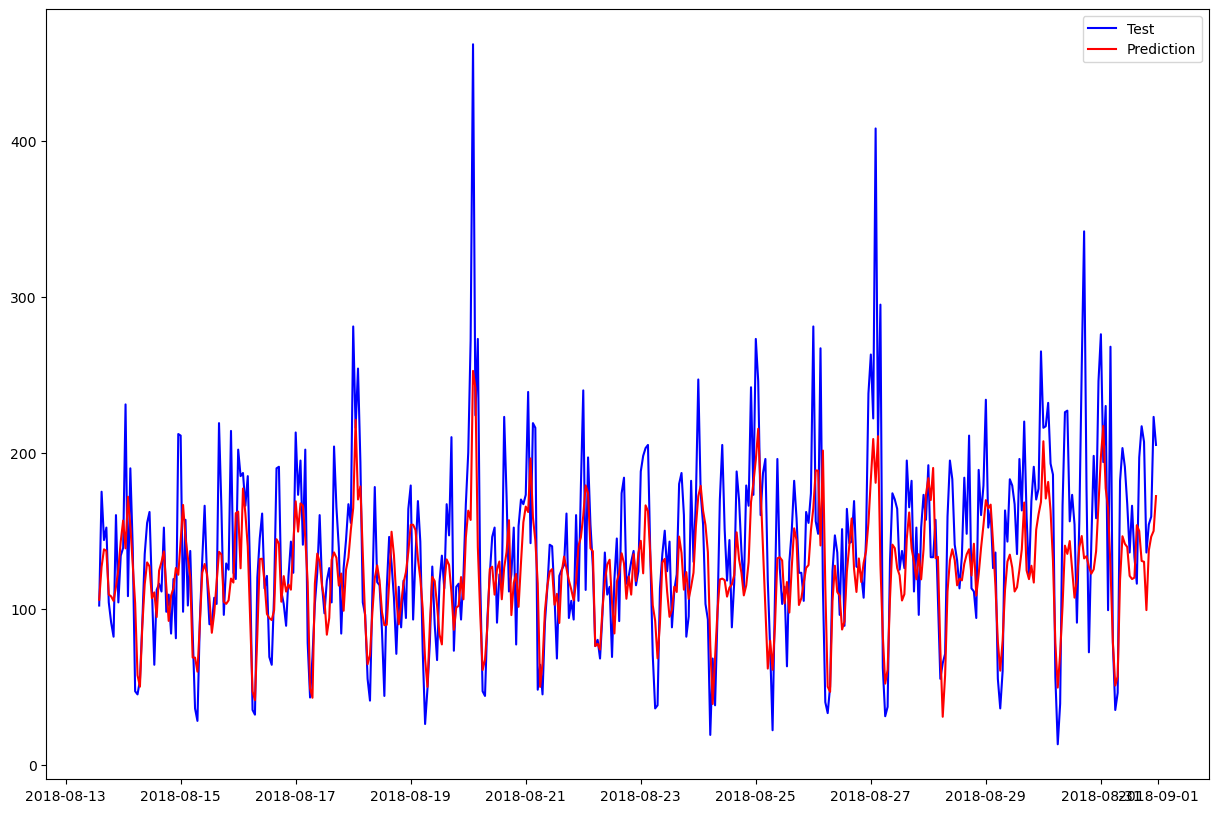

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 656, number of used features: 27
[LightGBM] [Info] Start training from score 56.852134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3740
[LightGBM] [Info] Number of data points in the train set: 1964, number of used features: 28
[LightGBM] [Info] Start training from score 63.487780
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 656, number of used features: 27
[LightGBM] [Info] Start training from score 56.852134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3346
[LightGBM] [Info] Number of data points in the train set: 1310, number of used features: 28
[LightGBM] [Info] Start training from score 59.392366
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4453
[LightGBM] [Info] Number of data points in the train set: 3272, number of used features: 28
[LightGBM] [Info] Start training from score 72.634474
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4068
[LightGBM] [Info] Number of data points in the train set: 2618, number of used features: 28
[LightGBM] [Info] Start trai

In [27]:
plt.figure(figsize=(15, 10))
plt.plot(y_test.index, y_test, 'b', label='Test')
plt.plot(y_test.index, pred, 'r', label='Prediction')
plt.legend()
None